In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization



In [3]:
path = 'C:/Users/rapha/Documents/CNAM/HO/2A/Python_Times_Series/DataSet3.xlsx'

In [4]:
df = pd.read_excel(path, sheet_name='Feuil3')
df.head()

,Date,Dernier,Ouv.,Plus Haut,Plus Bas
0,2000-01-06,1.0324,1.0325,1.0419,1.0275
1,2000-01-07,1.0292,1.0327,1.0333,1.0252
2,2000-01-10,1.0257,1.0288,1.0303,1.0213
3,2000-01-11,1.0335,1.0259,1.0342,1.0241
4,2000-01-12,1.0312,1.0322,1.0370,1.0258


In [5]:
df.columns = ['Date','Cloture', 'Ouverture', 'Plus haut', 'Plus bas']



In [6]:
# Créez un DataFrame contenant la plage de dates
min_date = df['Date'].min()
max_date = df['Date'].max()

date_range = pd.date_range(start=min_date, end=max_date)
date_df = pd.DataFrame({'Date': date_range})

# Fusionnez les DataFrames en utilisant la colonne "Date" comme clé de fusion
merged_df = pd.merge(date_df, df, on='Date', how='left')

# Remplissez les valeurs manquantes avec les données appropriées
merged_df['Cloture'] = merged_df['Cloture'].fillna(method='ffill')
merged_df['Ouverture'] = merged_df['Ouverture'].rolling(window=3, min_periods=1).mean()
merged_df['Plus haut'] = merged_df['Plus haut'].rolling(window=3, min_periods=1).mean()
merged_df['Plus bas'] = merged_df['Plus bas'].rolling(window=3, min_periods=1).mean()



merged_df

,Date,Cloture,Ouverture,Plus haut,Plus bas
0,2000-01-06,1.032400,1.032500,1.041900,1.027500
1,2000-01-07,1.029200,1.032600,1.037600,1.026350
2,2000-01-08,1.029200,1.032600,1.037600,1.026350
3,2000-01-09,1.029200,1.032700,1.033300,1.025200
4,2000-01-10,1.025700,1.028800,1.030300,1.021300
...,...,...,...,...,...
8751,2023-12-22,1.100619,1.097765,1.100669,1.095537
8752,2023-12-23,1.100619,1.097595,1.102017,1.096523
8753,2023-12-24,1.100619,1.100619,1.104057,1.099421
8754,2023-12-25,1.102657,1.102657,1.104240,1.099989


In [7]:
# Affichez le DataFrame final avec les lignes ajoutées pour les jours manquants
merged_df.head()
merged_df.drop('Ouverture', axis=1, inplace=True)
merged_df.drop('Plus haut', axis=1, inplace=True)
merged_df.drop('Plus bas', axis=1, inplace=True)
merged_df.head()

,Date,Cloture
0,2000-01-06,1.0324
1,2000-01-07,1.0292
2,2000-01-08,1.0292
3,2000-01-09,1.0292
4,2000-01-10,1.0257


In [8]:
merged_df.tail

<bound method NDFrame.tail of            Date   Cloture
0    2000-01-06  1.032400
1    2000-01-07  1.029200
2    2000-01-08  1.029200
3    2000-01-09  1.029200
4    2000-01-10  1.025700
...         ...       ...
8751 2023-12-22  1.100619
8752 2023-12-23  1.100619
8753 2023-12-24  1.100619
8754 2023-12-25  1.102657
8755 2023-12-26  1.102050

[8756 rows x 2 columns]>

In [9]:
min_date = merged_df['Date'].min()
max_date = pd.to_datetime('today')

date_range = pd.date_range(start=min_date, end=max_date)
date_df = pd.DataFrame({'Date': date_range})

# Fusionnez les DataFrames en utilisant la colonne "Date" comme clé de fusion
merged_df = pd.merge(date_df, merged_df, on='Date', how='left')

merged_df['Cloture'].fillna(1.054519, inplace=True, downcast='infer')

timeseries = merged_df["Cloture"].values.astype('float32')






In [10]:
merged_df

,Date,Cloture
0,2000-01-06,1.032400
1,2000-01-07,1.029200
2,2000-01-08,1.029200
3,2000-01-09,1.029200
4,2000-01-10,1.025700
...,...,...
8767,2024-01-07,1.054519
8768,2024-01-08,1.054519
8769,2024-01-09,1.054519
8770,2024-01-10,1.054519


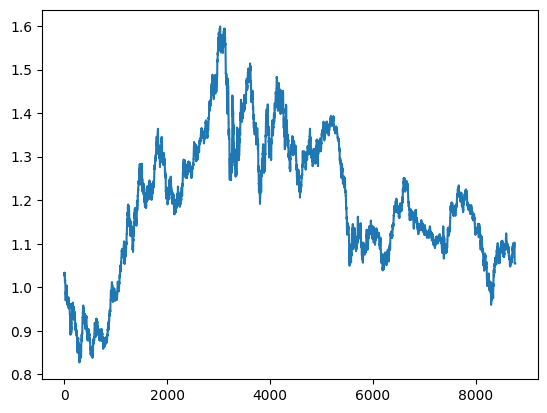

In [11]:
plt.plot(timeseries)
plt.show()
# Ordonnées : Clotures
# Abscisse : Time step

In [12]:
# Usually a time series should be “detrended” to remove the linear trend component and normalized before processing. For simplicity, these are skipped in this project.

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit the format of the scaler -> convert shape from (1000, ) -> (1000, 1)
close_price = merged_df["Cloture"].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [14]:
seq_len = 60

def split_into_sequences(data, seq_len):
    n_seq = len(data) - seq_len + 1
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

def get_train_test_sets(data, seq_len, train_frac):
    sequences = split_into_sequences(data, seq_len)
    n_train = int(sequences.shape[0] * train_frac)
    x_train = sequences[:n_train, :-1, :]
    y_train = sequences[:n_train, -1, :]
    x_test = sequences[n_train:, :-1, :]
    y_test = sequences[n_train:, -1, :]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = get_train_test_sets(scaled_close, seq_len, train_frac=0.8)

In [15]:
sequences = split_into_sequences(scaled_close, seq_len)
n_train = int(sequences.shape[0] * 0.2)
x_train = sequences[:n_train, :-1, :]
y_train = sequences[:n_train, -1, :]
x_test = sequences[n_train:, :-1, :]
y_test = sequences[n_train:, -1, :]

print("test 1")
print(x_train)


print("test 2")
print(x_test)

print("sequences")
len(sequences)



test 1
[[[0.26584576]
  [0.26169799]
  [0.26169799]
  ...
  [0.17770577]
  [0.17187297]
  [0.17187297]]

 [[0.26169799]
  [0.26169799]
  [0.26169799]
  ...
  [0.17187297]
  [0.17187297]
  [0.17187297]]

 [[0.26169799]
  [0.26169799]
  [0.25716137]
  ...
  [0.17187297]
  [0.17187297]
  [0.17122489]]

 ...

 [[0.53583927]
  [0.53272845]
  [0.52469216]
  ...
  [0.67180817]
  [0.6646792 ]
  [0.66791964]]

 [[0.53272845]
  [0.52469216]
  [0.5279326 ]
  ...
  [0.6646792 ]
  [0.66791964]
  [0.65651329]]

 [[0.52469216]
  [0.5279326 ]
  [0.5323396 ]
  ...
  [0.66791964]
  [0.65651329]
  [0.65405055]]]
test 2
[[[0.5279326 ]
  [0.5323396 ]
  [0.54348671]
  ...
  [0.65651329]
  [0.65405055]
  [0.64186649]]

 [[0.5323396 ]
  [0.54348671]
  [0.54348671]
  ...
  [0.65405055]
  [0.64186649]
  [0.64186649]]

 [[0.54348671]
  [0.54348671]
  [0.54348671]
  ...
  [0.64186649]
  [0.64186649]
  [0.64186649]]

 ...

 [[0.31037978]
  [0.31037978]
  [0.31330655]
  ...
  [0.29451588]
  [0.29451588]
  [0.294515

8713

In [16]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

# fraction of the input to drop; helps prevent overfitting
dropout = 0.2
window_size = seq_len - 1

# build a 3-layer LSTM RNN
model = keras.Sequential()

model.add(
    LSTM(window_size, return_sequences=True, 
         input_shape=(window_size, x_train.shape[-1]))
)

model.add(Dropout(rate=dropout))
# Bidirectional allows for training of sequence data forwards and backwards
model.add(
    Bidirectional(LSTM((window_size * 2), return_sequences=True)
)) 

model.add(Dropout(rate=dropout))
model.add(
    Bidirectional(LSTM(window_size, return_sequences=False))
) 

model.add(Dense(units=1))
# linear activation function: activation is proportional to the input
model.add(Activation('linear'))

In [17]:
batch_size = 500

model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

history = model.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=batch_size,
    shuffle=False,
    validation_split=0.2
)

Epoch 1/15
3/3 [==============================] - 13s 2s/step - loss: 0.0144 - val_loss: 0.0028
Epoch 2/15
3/3 [==============================] - 3s 954ms/step - loss: 0.0108 - val_loss: 0.0021
Epoch 3/15
3/3 [==============================] - 3s 942ms/step - loss: 0.0084 - val_loss: 0.0337
Epoch 4/15
3/3 [==============================] - 3s 912ms/step - loss: 0.0053 - val_loss: 0.0155
Epoch 5/15
3/3 [==============================] - 3s 878ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.0033 - val_loss: 0.0047
Epoch 7/15
3/3 [==============================] - 3s 916ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/15
3/3 [==============================] - 3s 933ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 9/15
3/3 [==============================] - 3s 941ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 10/15
3/3 [==============================] - 3s 923ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 11/15
3/3 [=======

In [18]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

window_size = seq_len - 1


model = keras.Sequential()
model.add(LSTM(10, activation='relu', input_shape=(window_size, x_train.shape[-1])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(x_train, y_train, epochs=10, verbose=0)

218/218 [==============================] - 1s 5ms/step


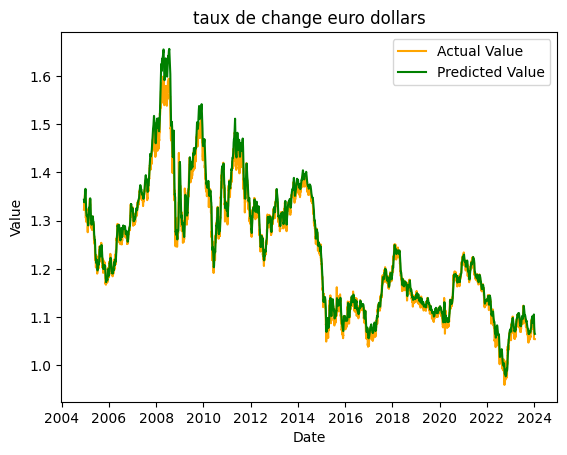

In [19]:
y_pred = model.predict(x_test)

dates = merged_df.iloc[len(merged_df) - len(y_test):]['Date']

# invert the scaler to get the absolute price data
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

# plots of prediction against actual data
plt.plot(dates, y_test_orig, label='Actual Value', color='orange')
plt.plot(dates, y_pred_orig, label='Predicted Value', color='green')
 
plt.title('taux de change euro dollars')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')

plt.show();

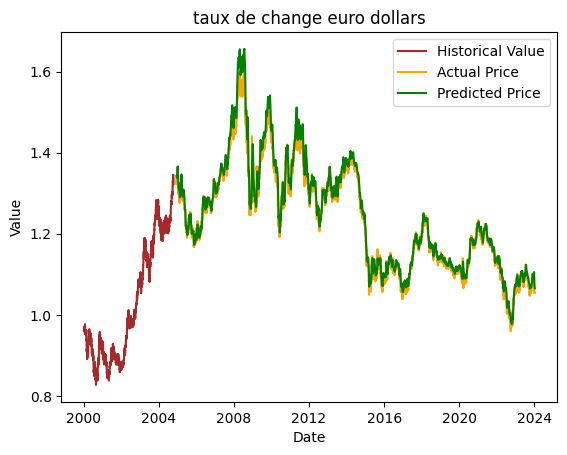

In [20]:
dates_train = merged_df.iloc[:len(y_train)]['Date']
plt.plot(dates_train, scaler.inverse_transform(y_train), color='brown', label='Historical Value')
plt.plot(dates, y_test_orig, color='orange', label='Actual Price')
plt.plot(dates, y_pred_orig, color='green', label='Predicted Price')


plt.title('taux de change euro dollars')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show();

In [21]:
print(y_pred_orig)
print("TEST")
print(y_test_orig)

[[1.3432682]
 [1.3418651]
 [1.3403019]
 ...
 [1.0658975]
 [1.0655192]
 [1.0652952]]
TEST
[[1.3225  ]
 [1.3225  ]
 [1.3311  ]
 ...
 [1.054519]
 [1.054519]
 [1.054519]]


In [22]:
n_rows_90_percent = len(y_test)

# Sélectionner les premières 90% lignes pour le nouveau DataFrame
df_90_percent = merged_df.tail(n_rows_90_percent)

# Afficher les premières lignes du nouveau DataFrame
print(df_90_percent)
len(df_90_percent)



           Date   Cloture
1801 2004-12-11  1.322500
1802 2004-12-12  1.322500
1803 2004-12-13  1.331100
1804 2004-12-14  1.330300
1805 2004-12-15  1.338500
...         ...       ...
8767 2024-01-07  1.054519
8768 2024-01-08  1.054519
8769 2024-01-09  1.054519
8770 2024-01-10  1.054519
8771 2024-01-11  1.054519

[6971 rows x 2 columns]


6971

In [23]:
df_90_percent["Prediction"] = y_pred_orig

df_90_percent.tail(20)

C:\Users\rapha\AppData\Local\Temp\ipykernel_15640\3414159297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_90_percent["Prediction"] = y_pred_orig


,Date,Cloture,Prediction
8752,2023-12-23,1.100619,1.101161
8753,2023-12-24,1.100619,1.102379
8754,2023-12-25,1.102657,1.103453
8755,2023-12-26,1.102050,1.104692
8756,2023-12-27,1.054519,1.105590
8757,2023-12-28,1.054519,1.098802
8758,2023-12-29,1.054519,1.093958
8759,2023-12-30,1.054519,1.089147
8760,2023-12-31,1.054519,1.084658
8761,2024-01-01,1.054519,1.080641


In [24]:
df_90_percent["Ecart"] = df_90_percent["Prediction"] - df_90_percent["Cloture"]
print(df_90_percent)

           Date   Cloture  Prediction     Ecart
1801 2004-12-11  1.322500    1.343268  0.020768
1802 2004-12-12  1.322500    1.341865  0.019365
1803 2004-12-13  1.331100    1.340302  0.009202
1804 2004-12-14  1.330300    1.340216  0.009916
1805 2004-12-15  1.338500    1.339444  0.000944
...         ...       ...         ...       ...
8767 2024-01-07  1.054519    1.067300  0.012781
8768 2024-01-08  1.054519    1.066474  0.011955
8769 2024-01-09  1.054519    1.065897  0.011378
8770 2024-01-10  1.054519    1.065519  0.011000
8771 2024-01-11  1.054519    1.065295  0.010776

[6971 rows x 4 columns]


C:\Users\rapha\AppData\Local\Temp\ipykernel_15640\1516014793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_90_percent["Ecart"] = df_90_percent["Prediction"] - df_90_percent["Cloture"]


In [25]:
# Sélection des données entre le 11 octobre et le 17 octobre
start_date = '2023-10-11'
end_date = '2023-10-17'

selected_data = df_90_percent[(df_90_percent['Date'] >= start_date) & (df_90_percent['Date'] <= end_date)]

In [26]:
print(selected_data)

           Date   Cloture  Prediction     Ecart
8679 2023-10-11  1.060479    1.065923  0.005444
8680 2023-10-12  1.062428    1.066802  0.004374
8681 2023-10-13  1.053674    1.067859  0.014185
8682 2023-10-14  1.053674    1.067493  0.013819
8683 2023-10-15  1.053674    1.067391  0.013717
8684 2023-10-16  1.052155    1.067218  0.015063
8685 2023-10-17  1.054519    1.066787  0.012268


In [27]:
df_90_percent["Ecart"].mean()

0.008707814475049522

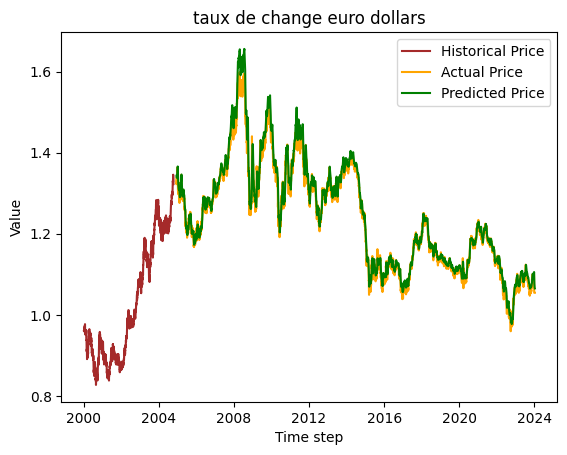

,Date,Cloture
0,2000-01-06,1.0324
1,2000-01-07,1.0292
2,2000-01-08,1.0292
3,2000-01-09,1.0292
4,2000-01-10,1.0257


In [28]:
dates_train = merged_df.iloc[:len(y_train)]['Date']
dates_test = merged_df.iloc[len(merged_df) - len(y_test):]['Date']
dates_pred = merged_df.iloc[len(merged_df) - len(y_test):]['Date']

# Inversion de l'échelle pour obtenir les données de prix absolues
y_train_orig = scaler.inverse_transform(y_train)
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

# Tracer les résultats de l'entraînement, des données réelles et prédites par rapport à leurs dates
plt.plot(dates_train, y_train_orig, color='brown', label='Historical Price')
plt.plot(dates_test, y_test_orig, color='orange', label='Actual Price')
plt.plot(dates_pred, y_pred_orig, color='green', label='Predicted Price')

plt.title('taux de change euro dollars')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.show();
merged_df.head()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcul du Mean Squared Error (MSE)
mse = mean_squared_error(y_test_orig, y_pred_orig)
print(f"Mean Squared Error (MSE): {mse}")

# Calcul du Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
print(f"Mean Absolute Error (MAE): {mae}")

# Calcul du Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_orig, y_pred_orig)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Squared Error (MSE): 0.00028877960595612867
Mean Absolute Error (MAE): 0.011753924345516916
Mean Absolute Percentage Error (MAPE): 0.9182296783426971%
